<a href="https://colab.research.google.com/github/nurulpradaninurul/nurul-deeplearning/blob/main/Uts_DataMining_Nurul%20Miftahul%20Pradani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
mkdir -p /content/data

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
cp /content/Data.zip /content/data

cp: cannot stat '/content/Data.zip': No such file or directory


In [103]:
!unzip /content/data/Data.zip

unzip:  cannot find or open /content/data/Data.zip, /content/data/Data.zip.zip or /content/data/Data.zip.ZIP.


In [104]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import os
from zipfile import ZipFile 
from scipy import stats
import seaborn as sns

In [106]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [107]:
# Membaca file .xlsx
df = pd.read_excel('/gdrive/MyDrive/Colab Notebooks/DatasetCuaca_convert.xlsx')
df.head()
# Menyimpan sebagai file .csv
# df.to_csv (r'/gdrive/MyDrive/Colab Notebooks/DatasetCuaca.csv', index = None, header=True)

,Bulan dan Tahun,Suhu Udara,Tekanan Udara,Kelembapan Udara,Kecepatan Angin,Curah Hujan
0,2019-01-01,27.9,1009.0,83.1,4.5,97.1
1,2019-02-01,27.6,1011.0,81.6,5.0,134.7
2,2019-03-01,27.8,1009.6,81.5,4.6,118.1
3,2019-04-01,27.9,1008.9,85.1,4.2,333.9
4,2019-05-01,27.8,1009.5,83.9,4.1,193.7


In [108]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/DatasetCuaca.csv')
df.head(100)

,Bulan dan Tahun,Suhu Udara,Tekanan Udara,Kelembapan Udara,Kecepatan Angin,Curah Hujan
0,2019-01-01,27.9,1009.0,83.1,4.5,97.1
1,2019-02-01,27.6,1011.0,81.6,5.0,134.7
2,2019-03-01,27.8,1009.6,81.5,4.6,118.1
3,2019-04-01,27.9,1008.9,85.1,4.2,333.9
4,2019-05-01,27.8,1009.5,83.9,4.1,193.7
5,2019-06-01,26.7,1009.5,89.6,4.9,362.0
6,2019-07-01,25.6,1010.2,89.7,5.2,298.0
7,2019-08-01,25.9,1010.5,85.9,6.2,141.0
8,2019-09-01,26.2,1011.4,84.8,6.5,76.7
9,2019-10-01,26.8,1009.4,88.0,4.5,360.0


In [109]:
# Membaca dataset suhu udara
data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/DatasetCuaca.csv')

# Menghitung mean
mean = data['Suhu Udara'].mean()

# Menghitung median
median = data['Suhu Udara'].median()

# Menghitung modus
mode = data['Suhu Udara'].mode()

print("Nilai Mean: ", mean)
print("Nilai Median: ", median)
print("Nilai Modus: ", mode)

Nilai Mean:  27.16111111111111
Nilai Median:  27.2
Nilai Modus:  0    26.6
1    27.2
2    27.4
3    27.8
4    28.0
Name: Suhu Udara, dtype: float64


In [110]:
# Membaca dataset Curah Hujan
data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/DatasetCuaca.csv')

# Menghitung mean
mean = data['Curah Hujan'].mean()

# Menghitung median
median = data['Curah Hujan'].median()

# Menghitung modus
mode = data['Curah Hujan'].mode()

print("Nilai Mean: ", mean)
print("Nilai Median: ", median)
print("Nilai Modus: ", mode)

Nilai Mean:  273.2527777777778
Nilai Median:  239.6
Nilai Modus:  0      25.9
1      35.6
2      38.7
3      76.7
4      81.7
5      97.1
6     118.1
7     121.0
8     134.7
9     141.0
10    147.0
11    165.8
12    175.0
13    180.0
14    193.7
15    223.5
16    233.0
17    236.0
18    243.2
19    283.1
20    287.0
21    298.0
22    302.0
23    330.0
24    333.9
25    360.0
26    362.0
27    377.0
28    391.5
29    394.4
30    478.0
31    511.0
32    516.7
33    519.0
34    678.2
35    747.6
Name: Curah Hujan, dtype: float64


In [111]:
data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/DatasetCuaca.csv')

In [112]:
print(data.describe())

       Suhu Udara  Tekanan Udara  Kelembapan Udara  Kecepatan Angin  \
count   36.000000      36.000000         36.000000        36.000000   
mean    27.161111    1009.052778         85.294444         4.350000   
std      0.678350       0.959907          3.106670         0.618061   
min     25.600000    1007.200000         78.000000         3.700000   
25%     26.675000    1008.475000         83.700000         4.000000   
50%     27.200000    1009.000000         85.050000         4.150000   
75%     27.800000    1009.525000         88.000000         4.525000   
max     28.400000    1011.400000         90.000000         6.500000   

       Curah Hujan  
count    36.000000  
mean    273.252778  
std     176.640231  
min      25.900000  
25%     139.425000  
50%     239.600000  
75%     365.750000  
max     747.600000  


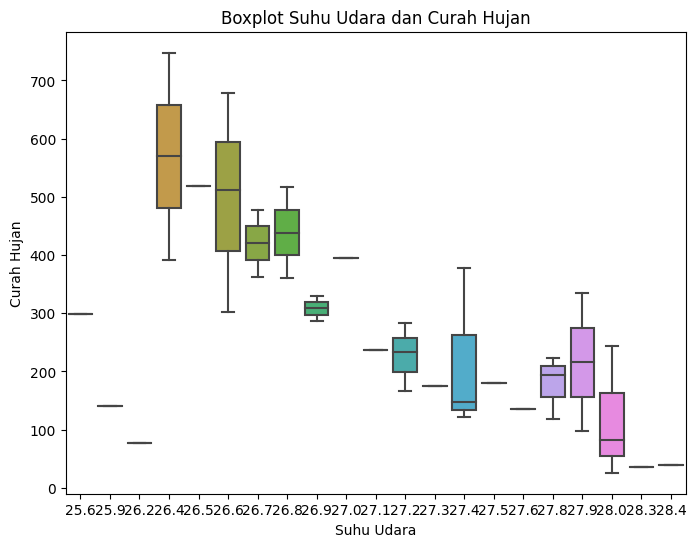

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Suhu Udara', y='Curah Hujan', data=data)
plt.title('Boxplot Suhu Udara dan Curah Hujan')
plt.xlabel('Suhu Udara')
plt.ylabel('Curah Hujan')
plt.show()

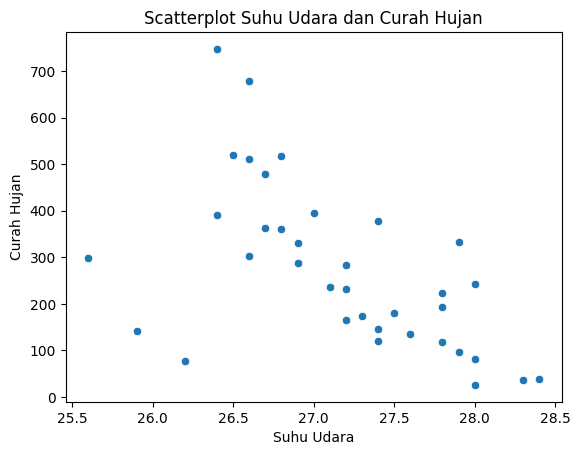

In [114]:
sns.scatterplot(x='Suhu Udara', y='Curah Hujan', data=data)
plt.title('Scatterplot Suhu Udara dan Curah Hujan')
plt.xlabel('Suhu Udara')
plt.ylabel('Curah Hujan')
plt.show()

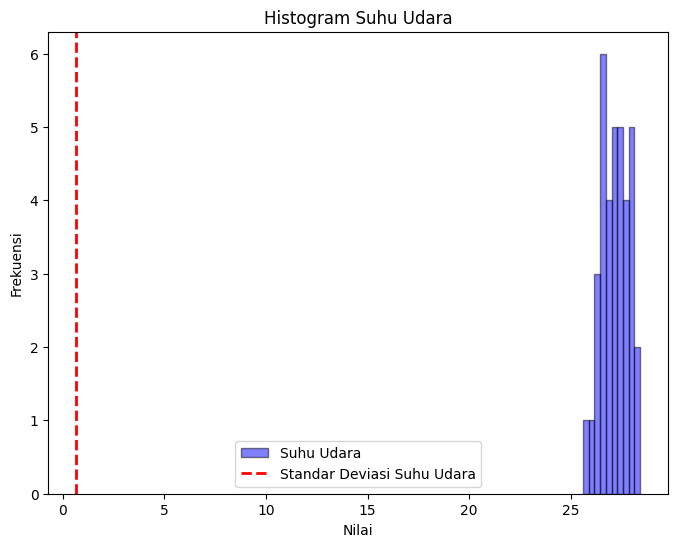

In [115]:
# Menghitung standar deviasi
std_Suhu_Udara = data['Suhu Udara'].std()

# Membuat histogram curah hujan
plt.figure(figsize=(8, 6))
plt.hist(data['Suhu Udara'], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Suhu Udara')

# Menambahkan garis vertikal untuk standar deviasi curah hujan
plt.axvline(x=std_Suhu_Udara, color='red', linestyle='--', linewidth=2, label='Standar Deviasi Suhu Udara')

plt.title('Histogram Suhu Udara')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

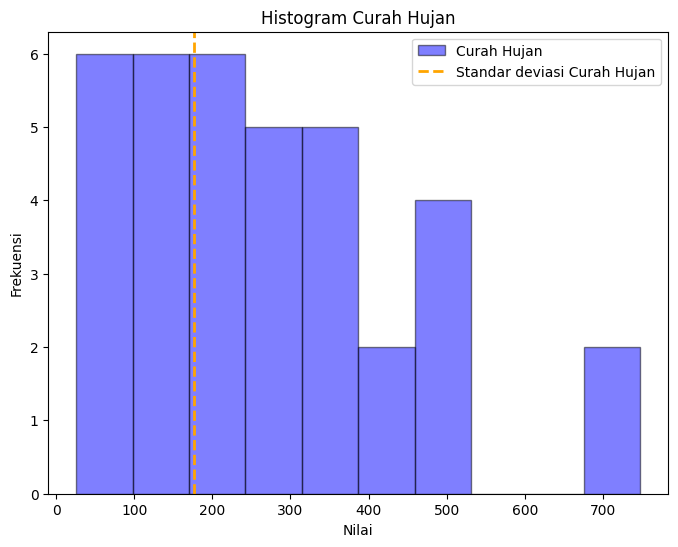

In [116]:
# Menghitung standar deviasi
std_Curah_Hujan = data['Curah Hujan'].std()

# Membuat histogram suhu
plt.figure(figsize=(8, 6))
plt.hist(data['Curah Hujan'], bins=10, alpha=0.5, color='blue', edgecolor='black', label='Curah Hujan')

# Menambahkan garis vertikal untuk standar deviasi suhu
plt.axvline(x=std_Curah_Hujan, color='orange', linestyle='--', linewidth=2, label='Standar deviasi Curah Hujan')

plt.title('Histogram Curah Hujan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [117]:
data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/DatasetCuaca.csv')

In [118]:
report = pandas_profiling.ProfileReport(data)

In [119]:
report = pandas_profiling.ProfileReport(data)

In [120]:
report.to_file('laporan_data.pdf')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:314: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
report.to_notebook_iframe()